# Decision Tree Classifier

In this kernel, We build a Decision Tree Classifier to predict the Species of Flower.

Decision trees can be used for classification as well as regression problems. The name itself suggests that it uses a flowchart like a tree structure to show the predictions that result from a series of feature-based splits. It starts with a root node and ends with a decision made by leaves.

### Terminologies in Decision Tree:
**Root Nodes** – It is the node present at the beginning of a decision tree from this node the population starts dividing according to various features.

**Decision Nodes** – the nodes we get after splitting the root nodes are called Decision Node

**Leaf Nodes** – the nodes where further splitting is not possible are called leaf nodes or terminal nodes

**Sub-tree** – just like a small portion of a graph is called sub-graph similarly a sub-section of this decision tree is called sub-tree.

**Pruning** – is nothing but cutting down some nodes to stop overfitting. It is of two types Pre-pruning and Post-pruning.

### Methodology for building a Decision Tree for Classification:
- A feature and its value is selected by assessing over all features and values that best splits the data into different classes.
- This process is repeated for data at each decision node formed after splitting to further split data into different classes to achieve maximum homogenity of classes at leaf nodes.


### Attribute selection measures 

The primary challenge in the Decision Tree implementation is to identify the attributes which we consider as the root node at each level. This process is known as the attributes selection. There are different attributes selection measure to identify the attribute which can be considered as the root node at each level.

There are 2 popular attribute selection measures. They are as follows:-

**Information gain**

**Gini index**

While using Information gain as a criterion, we assume attributes to be categorical and for Gini index attributes are assumed to be continuous. These attribute selection measures are described below.

### Entropy and Information Gain:
- Entropy measures the impurity in the given dataset. In Physics and Mathematics, entropy is referred to as the randomness or uncertainty of a random variable X. In information theory, it refers to the impurity in a group of examples. Information gain is the decrease in entropy. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values.

- Entropy is represented by the following formula:-

![Entropy](http://www.learnbymarketing.com/wp-content/uploads/2016/02/entropy-formula.png)



Here, **c** is the number of classes and **pi** is the probability associated with the ith class.

### Gini Index:
- The Gini Index or Gini Impurity is calculated by subtracting the sum of the squared probabilities of each class from one. It favours mostly the larger partitions and are very simple to implement. In simple terms, it calculates the probability of a certain randomly selected feature that was classified incorrectly.

- The Gini Index varies between 0 and 1, where 0 represents purity of the classification and 1 denotes random distribution of elements among various classes. A Gini Index of 0.5 shows that there is equal distribution of elements across some classes.

![Gini index](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRzYHkcmZKKp2sJN1HpHvw-NgqbD9EnapnbXozXRgajrSGvEnYy&s)


Here, again **c** is the number of classes and **pi** is the probability associated with the ith class.

### 2. Importing and preperation of data

#### Import libraries

In [1]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

#### Load dataset

In [2]:
# Importing the dataset
data = pd.read_csv('Iris.csv')

#### Summarize the Dataset

In [3]:
# We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.
data.shape

(150, 6)

In [4]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count.
data.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

#### Dividing data into features and labels

In [28]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = data[feature_columns].values
y = data['Species'].values

#### Spliting dataset into training set and test set

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Decision Tree Classification Algorithm works by splitting data by using a feature value. Hence it does not require feature scaling.**

### 3. Data Visualization

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Pairplot

Pairwise is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset.

<Figure size 432x288 with 0 Axes>

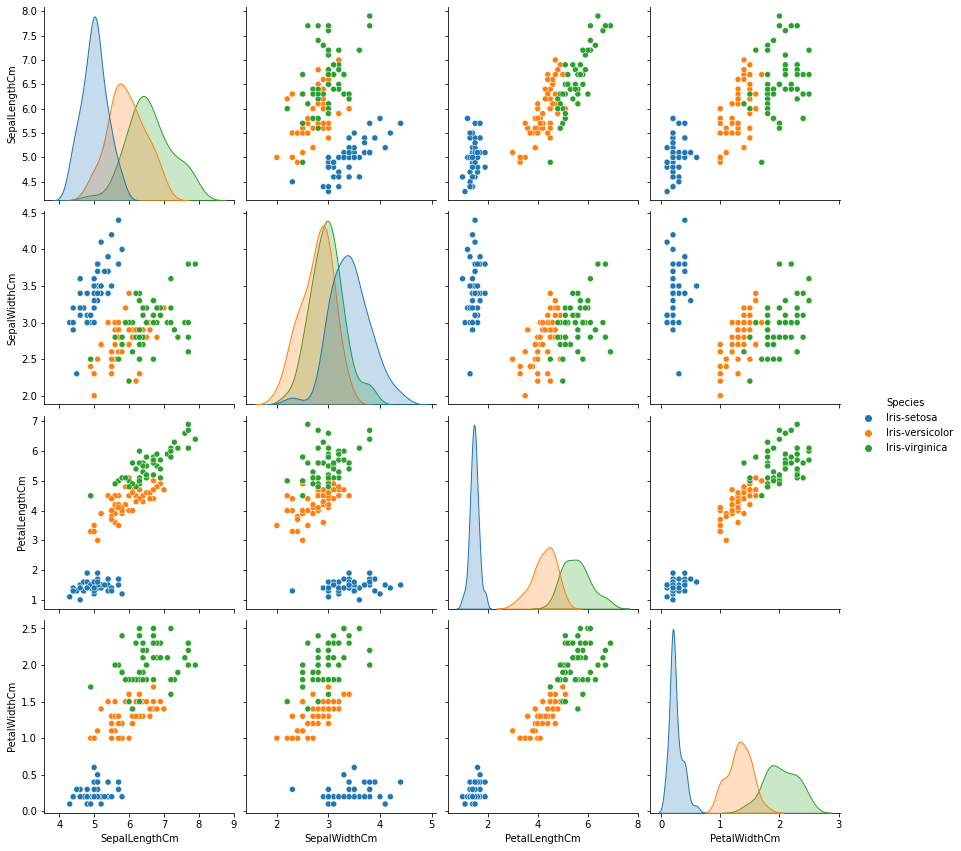

In [31]:
plt.figure()
sns.pairplot(data.drop("Id", axis=1), hue = "Species", size=3)
plt.show()

#### Boxplots

<Figure size 432x288 with 0 Axes>

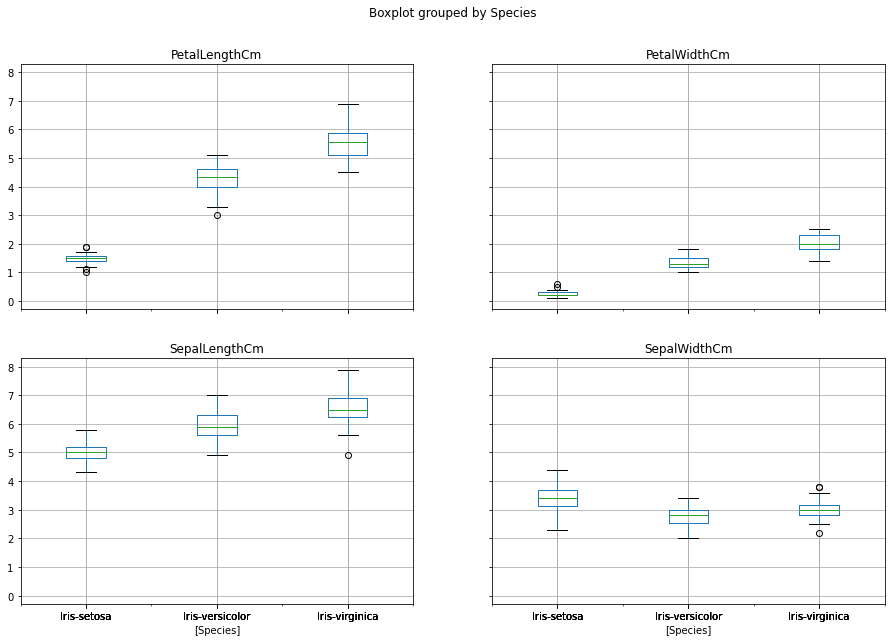

In [32]:
plt.figure()
data.drop("Id", axis=1).boxplot(by="Species", figsize=(15, 10))
plt.show()

### 4. Decision Tree Classifier

**Hyperparameters**

In [33]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

**Building Decision Tree Model and Hyperparameter tuning using GridSearchCV**

- GridSearchCV builds models on all possible combinations of hyperparameters and checks accuracy of each model on crossvalidation set (Training set is divided into k equal folds and everytime k-1 folds are used for training and rest 1 fold is used for testing/validation. Each model accuracy is determined by taking average of accuracies calculated considering all k folds as vaidation fold one by one).
- In RandomizedSearchCV models are built on random combinations of hyperparameters and not all possible combinations.
- Both methods result in effective selection of hyperparameters.

In [35]:
predtree = DecisionTreeClassifier()
tree_cv=GridSearchCV(predtree, parameters, cv=10, scoring='accuracy')
tree_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [36]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.975


**Defining DecisionTree Model**

In [37]:
iris_tree= DecisionTreeClassifier(criterion='gini',max_depth=10,max_features='sqrt',min_samples_leaf=1,min_samples_split=10,splitter='random')

In [38]:
iris_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, max_features='sqrt', min_samples_split=10,
                       splitter='random')

### Predicting on Test Data

In [39]:
y_predtest=iris_tree.predict(X_test)

In [40]:
y_predtrain=iris_tree.predict(X_train)

#### Evaluating predictions

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Calculating model accuracy:

In [42]:
accuracy = accuracy_score(y_test, y_predtest)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


**Defining Function to evaluate Predictions**

In [43]:
def evaluate(y,y_predict):
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Iris-setosa','Iris-versicolor', 'Iris-verginica']); ax.yaxis.set_ticklabels(['Iris-setosa','Iris-versicolor', 'Iris-verginica'])
    print(classification_report(y, y_predict))

**Confusion Matrices on Train Data**

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        39
Iris-versicolor       0.90      0.97      0.94        37
 Iris-virginica       0.98      0.91      0.94        44

       accuracy                           0.96       120
      macro avg       0.96      0.96      0.96       120
   weighted avg       0.96      0.96      0.96       120



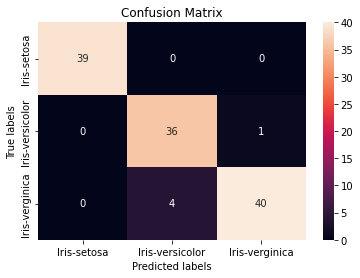

In [44]:
evaluate(y_train, y_predtrain)

**Confusion Matrices on Test Data**

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



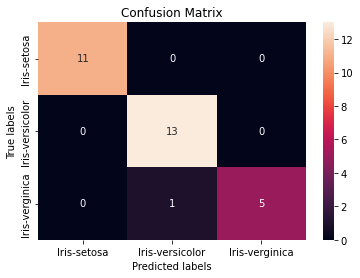

In [45]:
evaluate(y_test, y_predtest)

### 6. Visualizing Decision Tree

In [46]:
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

[Text(0.5, 0.9285714285714286, 'X[2] <= 4.557\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.3076923076923077, 0.7857142857142857, 'X[2] <= 4.244\ngini = 0.501\nsamples = 68\nvalue = [39, 28, 1]'),
 Text(0.23076923076923078, 0.6428571428571429, 'X[3] <= 1.048\ngini = 0.448\nsamples = 59\nvalue = [39, 20, 0]'),
 Text(0.15384615384615385, 0.5, 'X[2] <= 3.164\ngini = 0.201\nsamples = 44\nvalue = [39, 5, 0]'),
 Text(0.07692307692307693, 0.35714285714285715, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.23076923076923078, 0.35714285714285715, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(0.3076923076923077, 0.5, 'gini = 0.0\nsamples = 15\nvalue = [0, 15, 0]'),
 Text(0.38461538461538464, 0.6428571428571429, 'gini = 0.198\nsamples = 9\nvalue = [0, 8, 1]'),
 Text(0.6923076923076923, 0.7857142857142857, 'X[3] <= 2.035\ngini = 0.286\nsamples = 52\nvalue = [0, 9, 43]'),
 Text(0.6153846153846154, 0.6428571428571429, 'X[3] <= 1.663\ngini = 0.412\nsamples = 31\nvalue

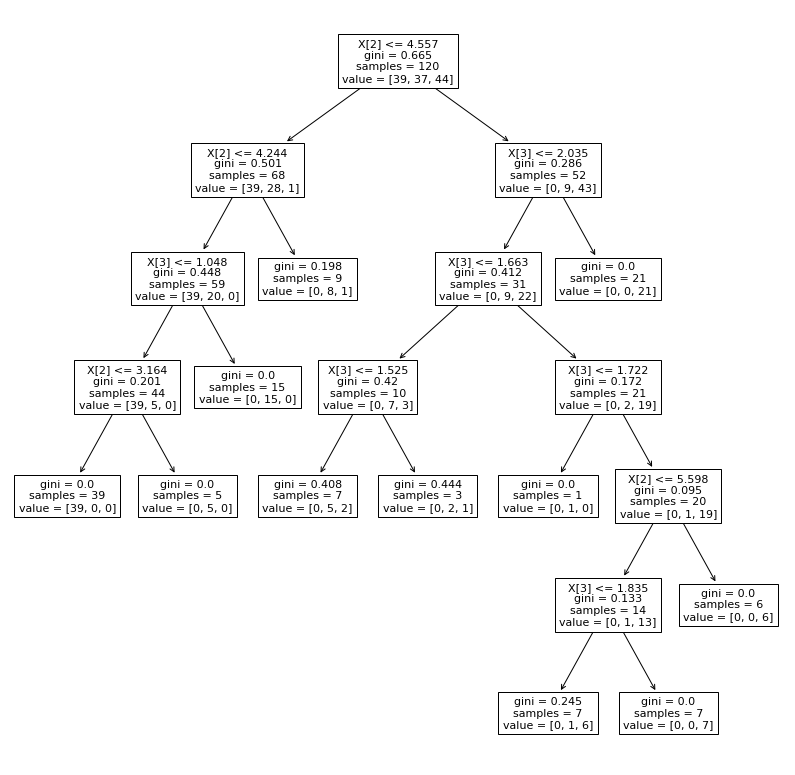

In [47]:
plt.figure(figsize=(14,14))
tree.plot_tree(iris_tree)